<a href="https://colab.research.google.com/github/RIDDHI1624/Drug-Discovery/blob/main/Insulin_Receptor_Project/Scaffold_Definition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install rdkit

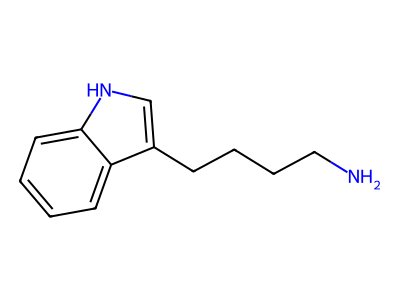

In [10]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

# Your original prompt ligand from Phase 1
original_smiles = "C1=CC=C2C(=C1)C(=CN2)CCCCN"
mol = Chem.MolFromSmiles(original_smiles)
Draw.MolToImage(mol, size=(400, 300))

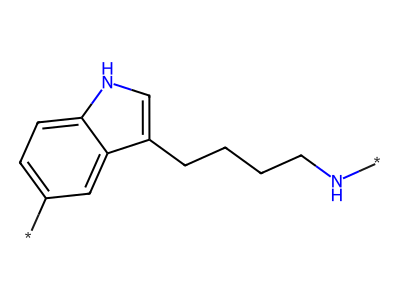

In [11]:
# LibInvent scaffold with two [*] dummy atoms marking growth vectors
# [*] atom 1 → hinge-directed growth (toward Met1079)
# [*] atom 2 → selectivity hotspot growth (toward Ile1061/Val1063)
scaffold_smiles = "[*]c1ccc2[nH]cc(CCCCN[*])c2c1"

scaffold = Chem.MolFromSmiles(scaffold_smiles)
Draw.MolToImage(scaffold, size=(400, 300))

In [12]:
# Validate scaffold structure
print(f"Scaffold valid: {scaffold is not None}")
print(f"Number of atoms: {scaffold.GetNumAtoms()}")
print(f"Number of dummy atoms [*]: {sum(1 for a in scaffold.GetAtoms() if a.GetSymbol() == '*')}")

# Find and inspect attachment points
dummy_atoms = [a.GetIdx() for a in scaffold.GetAtoms() if a.GetSymbol() == '*']
print(f"Dummy atom indices: {dummy_atoms}")

for idx in dummy_atoms:
    atom = scaffold.GetAtomWithIdx(idx)
    neighbors = [scaffold.GetAtomWithIdx(n.GetIdx()).GetSymbol() for n in atom.GetNeighbors()]
    print(f"  [*] at index {idx} connected to: {neighbors}")

Scaffold valid: True
Number of atoms: 16
Number of dummy atoms [*]: 2
Dummy atom indices: [0, 13]
  [*] at index 0 connected to: ['C']
  [*] at index 13 connected to: ['N']


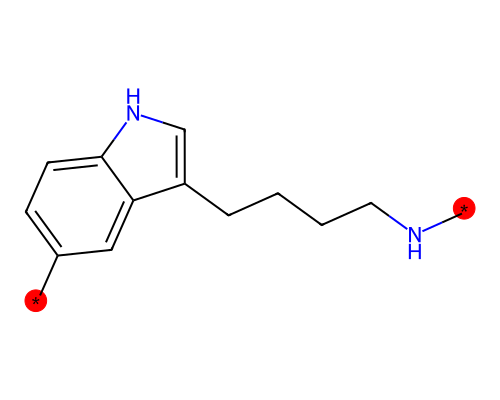

In [13]:
# Visualize scaffold with attachment points highlighted
AllChem.Compute2DCoords(scaffold)

img = Draw.MolToImage(scaffold, size=(500, 400),
                       highlightAtoms=dummy_atoms,
                       highlightColor=(1, 0, 0))
img

In [14]:
# Print the scaffold SMILES that goes into REINVENT / LiteFold
print(f"Scaffold SMILES for LibInvent: {scaffold_smiles}")

# Save to file
with open("scaffold.smi", "w") as f:
    f.write(scaffold_smiles + "\n")

# Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
os.makedirs('/content/drive/MyDrive/Project_allostery/Phase2', exist_ok=True)
!cp scaffold.smi /content/drive/MyDrive/Project_allostery/Phase2/

print("Scaffold saved to Drive!")
print(f"\nStep 1 Complete: Scaffold Definition and Fragmentation")
print(f"  Core: Indole head group (fixed)")
print(f"  Attachment point 1: Indole ring → hinge-directed (Met1079)")
print(f"  Attachment point 2: Amine nitrogen → selectivity hotspot (Ile1061/Val1063)")
print(f"  SMILES: {scaffold_smiles}")

Scaffold SMILES for LibInvent: [*]c1ccc2[nH]cc(CCCCN[*])c2c1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Scaffold saved to Drive!

Step 1 Complete: Scaffold Definition and Fragmentation
  Core: Indole head group (fixed)
  Attachment point 1: Indole ring → hinge-directed (Met1079)
  Attachment point 2: Amine nitrogen → selectivity hotspot (Ile1061/Val1063)
  SMILES: [*]c1ccc2[nH]cc(CCCCN[*])c2c1


In [15]:
!cat /content/drive/MyDrive/Project_allostery/Phase2/scaffold.smi

[*]c1ccc2[nH]cc(CCCCN[*])c2c1
